## Exercício 1

Para a resolução do exercício, será utilizada o módulo **numpy** para a computação da função cosseno, e o módulo **matplotlib** para a construção dos gráficos  

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


### Item a)
Resolução da equação $$x^{3/2} - \cos(x) = 0 $$
usando o método de bissecção. Neste caso foi utilizado uma função recursiva para a elaboração deste método.



In [10]:
def f(x):
    return x**(3/2) - np.cos(x)

def metodo_bisseccao(x1, x2, func, epsilon = 1e-10):
    fx1 = func(x1)
    xm = (x1+x2)/2
    fxm = func(xm)
    if fx1*fxm >= 0:
        x1 = xm
    else: 
        x2 = xm
    if np.abs(x1 - x2) < epsilon:
        print(f'Possível raiz: {x1} ou {x2}')
        return (x1, x2)
    else:
        return metodo_bisseccao(x1, x2, func, epsilon)

Consideremos que a solução da equação está no intervalo [0,1]

In [11]:
x1 = 0
x2 = 1
x0 =metodo_bisseccao(x1, x2, f)
print(x0)

Possível raiz: 0.7908208307926543 ou 0.790820830850862
(0.7908208307926543, 0.790820830850862)


Ou seja, para este método podemos adotar o resultado $$x_0 = 0.79082$$ como solução da equação. É importante notar que $x_1$ e $x_2$ são igualmente válidas neste método.

Agora, iremos ajustar um gráfico da função $f(x) = x^{3/2} - \cos(x)$ para verificar se há outras raízes, e analisar se o resultado obtido faz sentido ou não.

Possível raiz: 0.7908208307926543 ou 0.790820830850862


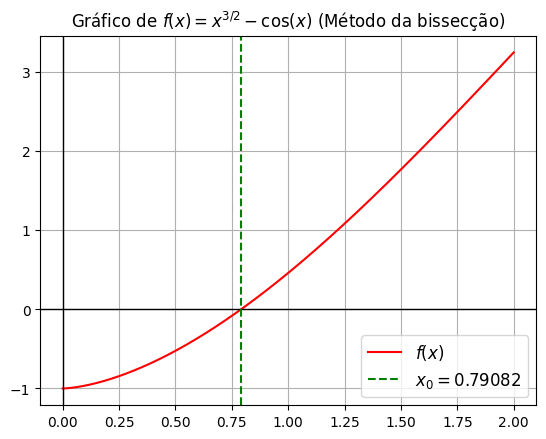

In [12]:
x = np.linspace(0., 2, 1000)
y = f(x)
x0 = metodo_bisseccao(x1, x2, f)[0]


plt.plot(x, y, '-', color = 'r', label = '$f(x)$')
plt.grid(True)
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.axvline(x0, linestyle= '--', color = 'g', label =f'$x_0 = {x0:.5f}$')

plt.title('Gráfico de $f(x) = x^{3/2} - \cos(x)$ (Método da bissecção)') #título
plt.legend(loc = 'lower right', fontsize= 12)

E como podemos observar acima, a solução encontrada pelo método da bissetriz é satisfatória e única. Importante notar que para $x<0$ não possui valores de $f(x)$ reais.

### Item b) 
Repita o item a) com método de *Newton-Raphson*

Iremos também computar a derivada $f'(x)$: $$f'(x) = \frac{3}{2}x^{1/2} + \sin(x) $$
E, novamente usando uma função recursiva, temos:

In [13]:
def dfdx(x):
    return (3/2)*x**(1/2) + np.sin(x)


def newton_raphson(xn0, f, dfdx, epsilon = 1e-5):
    xn = xn0
    xn_1 = xn - f(xn)/dfdx(xn)
    erro = np.abs((xn_1 -xn)/xn) #erro relativo
    if erro < epsilon:
        print(f'Possível raiz: {xn_1}')
        return xn_1
    else: 
        return newton_raphson(xn_1, f, dfdx, epsilon)

Um problema analisado neste método, é possível observar a importância da definição do $x_{n=0}$ para a primeira iteração, dependendo da função ao qual estamos aplicando o método Newton-Raphson. Ao introduzir um $x_{n=0} = 0$, há uma falha no compilador, não executando a função *newton_raphson(0, f, dfdx)*, obrigando a reinicialização do Kernel do notebook python interativo

In [14]:
# x0 = 0 
# newton_raphson(x0, f, dfdx, epsilon)
# A execução dessa célula causa uma falha no Kernel, obrigando a sua reinicialização

Mas ao usar $x_{n=0} = 1$, conseguimos aplicar o método da maneira esperada:

In [15]:
xn0 = 1
newton_raphson(xn0, f, dfdx)

Possível raiz: 0.7908208308075338


0.7908208308075338

Analisando graficamente:

Possível raiz: 0.7908208308075338


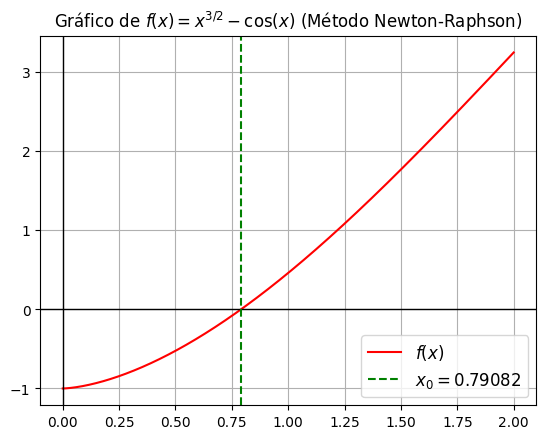

In [16]:
x = np.linspace(0., 2, 1000)
y = f(x)
x0 = newton_raphson(xn0, f, dfdx)


plt.plot(x, y, '-', color = 'r', label = '$f(x)$')
plt.grid(True)
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.axvline(x0, linestyle= '--', color = 'g', label =f'$x_0 = {x0:.5f}$')

plt.title('Gráfico de $f(x) = x^{3/2} - \cos(x)$ (Método Newton-Raphson)') #título
plt.legend(loc = 'lower right', fontsize= 12)

Ainda obtemos um resultado satisfatório, quase igual aos obtidos pelo método da bissecção

### Item c)


Inicialmente iremos definir $V(r)$ e $F(r)$: $$V(r) = - \frac{e^2}{4 \pi \epsilon _0 r} + V_0 \exp(-r/r_0)$$ $$ F(r) = -\frac{e^2}{4 \pi \epsilon _0 r^2}  + \frac{V_0}{r_0} \exp(-r/r_0)$$

In [28]:
k = 14.4
V_0 = 2130
r_0 = 0.326

def V(r):
    return - k/r + V_0 * np.exp(-r/r_0)

def F(r):
    return - k/r**2 + (V_0/r_0) * np.exp(-r/r_0)

Gráficos de $V(r)$ e $F(r)$ :

D:\TEMP\ipykernel_14412\1208381875.py:6: RuntimeWarning: divide by zero encountered in divide
  return - k/r + V_0 * np.exp(-r/r_0)


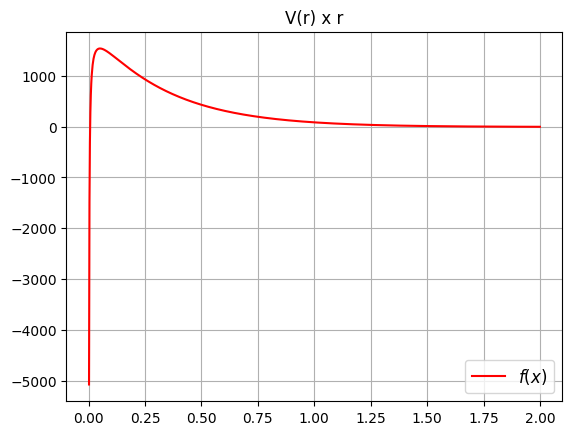

In [29]:
r = np.linspace(0., 2, 1000)
Vr = V(r)




plt.plot(r, Vr, '-', color = 'r', label = '$f(x)$')
plt.grid(True)

plt.title('V(r) x r') #título
plt.legend(loc = 'lower right', fontsize= 12)

D:\TEMP\ipykernel_14412\1208381875.py:9: RuntimeWarning: divide by zero encountered in divide
  return - k/r**2 + (V_0/r_0) * np.exp(-r/r_0)


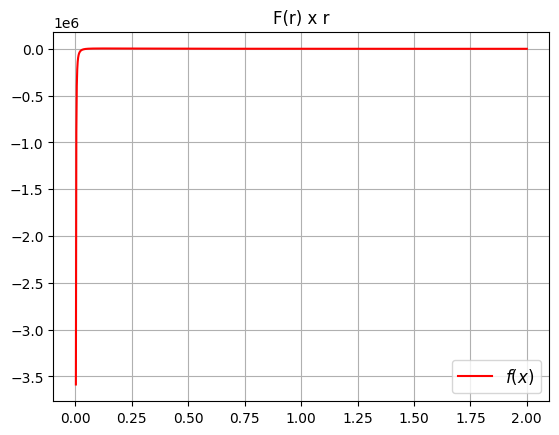

In [30]:
Fr = F(r)




plt.plot(r, Fr, '-', color = 'r', label = '$f(x)$')
plt.grid(True)

plt.title('F(r) x r') #título
plt.legend(loc = 'lower right', fontsize= 12)